In [65]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [66]:
tf.__version__

'2.8.0'

In [67]:
IMAGE_SIZE = 256
CHANNELS = 3

In [68]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 1506 images belonging to 3 classes.


In [69]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [70]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [71]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.6313726  0.5882353  0.61960787]
  [0.6313726  0.5882353  0.61960787]
  [0.6313726  0.5882353  0.61960787]
  ...
  [0.391113   0.34013262 0.3675836 ]
  [0.48426637 0.43328598 0.46073696]
  [0.42151597 0.37053558 0.39798656]]

 [[0.61350834 0.5703711  0.60174364]
  [0.6180915  0.5749543  0.6063268 ]
  [0.6226746  0.57953733 0.6109099 ]
  ...
  [0.40944543 0.35846502 0.38591602]
  [0.4766279  0.42564747 0.45309845]
  [0.4113313  0.3603509  0.3878019 ]]

 [[0.5843682  0.541231   0.5726035 ]
  [0.5874236  0.5442864  0.5756589 ]
  [0.590479   0.54734176 0.5787143 ]
  ...
  [0.42777786 0.37679744 0.40424842]
  [0.46898934 0.41800895 0.44545993]
  [0.4011466  0.3501662  0.37761718]]

 ...

 [[0.4853413  0.45396873 0.5127923 ]
  [0.48955324 0.4581807  0.51700425]
  [0.51719284 0.4858203  0.5446438 ]
  ...
  [0.42858145 0.37760106 0.41681674]
  [0.434183   0.3832026  0.4224183 ]
  [0.4397846  0.3888042  0.42801988]]

 [[0.48483208 0.45345953 0.512283  ]
  [0.49362713 0.46225458 0.5210781 ]


In [72]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [73]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 431 images belonging to 3 classes.


In [74]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.49899337 0.38526788 0.3303659 ]
  [0.48432893 0.3706034  0.31570145]
  [0.50588757 0.39216208 0.33726013]
  ...
  [0.6901961  0.5803922  0.53333336]
  [0.6901961  0.5803922  0.53333336]
  [0.6901961  0.5803922  0.53333336]]

 [[0.49967942 0.38595393 0.33105195]
  [0.48374087 0.37001535 0.3151134 ]
  [0.5054956  0.39177006 0.3368681 ]
  ...
  [0.6949323  0.58512837 0.5380695 ]
  [0.6955203  0.58571637 0.53865755]
  [0.69610834 0.5863044  0.5392456 ]]

 [[0.50036544 0.38663995 0.331738  ]
  [0.48315284 0.36942732 0.31452537]
  [0.5051035  0.39137802 0.33647606]
  ...
  [0.7153018  0.6054979  0.558439  ]
  [0.71549785 0.6056939  0.55863506]
  [0.7156938  0.60588986 0.55883104]]

 ...

 [[0.4933525  0.36786228 0.3168819 ]
  [0.4919804  0.3664902  0.3155098 ]
  [0.4906083  0.3651181  0.3141377 ]
  ...
  [0.58549803 0.4600078  0.40118426]
  [0.5776573  0.4521671  0.39334357]
  [0.5764706  0.45098042 0.3921569 ]]

 [[0.43219835 0.30670813 0.25572774]
  [0.43063024 0.30514005 0.25415966]


In [75]:
# Building the model
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [76]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 64)      

In [77]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [78]:
1506/32

47.0625

In [79]:
215/32

6.71875

In [80]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20,
)

Epoch 1/20


W0413 11:51:12.772815 26512 ag_logging.py:142] AutoGraph could not transform <function Model.make_train_function.<locals>.train_function at 0x0000020644F756A8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
47/47 [==============================] - ETA: 0s - loss: 0.9399 - accuracy: 0.4756

W0413 11:52:06.621272 26512 ag_logging.py:142] AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000002064D160378> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
47/47 [==============================] - 58s 1s/step - loss: 0.9399 - accuracy: 0.4756 - val_loss: 0.8747 - val_accuracy: 0.6771
Epoch 2/20
47/47 [==============================] - 60s 1s/step - loss: 0.7743 - accuracy: 0.6513 - val_loss: 0.5972 - val_accuracy: 0.7500
Epoch 3/20
47/47 [==============================] - 57s 1s/step - loss: 0.4535 - accuracy: 0.8168 - val_loss: 0.3573 - val_accuracy: 0.8490
Epoch 4/20
47/47 [==============================] - 57s 1s/step - loss: 0.3298 - accuracy: 0.8758 - val_loss: 0.3074 - val_accuracy: 0.8542
Epoch 5/20
47/47 [==============================] - 55s 1s/step - loss: 0.2747 - accuracy: 0.8916 - val_loss: 0.5486 - val_accuracy: 0.7917


In [81]:
scores = model.evaluate(test_generator)

14/14 [==============================] - 9s 615ms/step - loss: 0.1267 - accuracy: 0.9559


In [82]:
scores

[0.12668529152870178, 0.9559164643287659]

In [83]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [84]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [85]:
len(history.history['loss'])

20

In [86]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.9399388432502747,
 0.7743121385574341,
 0.4534653425216675,
 0.32982268929481506,
 0.2746734023094177]

In [87]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [88]:
val_acc

[0.6770833134651184,
 0.75,
 0.8489583134651184,
 0.8541666865348816,
 0.7916666865348816,
 0.8854166865348816,
 0.875,
 0.890625,
 0.8541666865348816,
 0.8697916865348816,
 0.9635416865348816,
 0.96875,
 0.9010416865348816,
 0.9635416865348816,
 0.9635416865348816,
 0.9583333134651184,
 0.9375,
 0.8697916865348816,
 0.9479166865348816,
 0.9479166865348816]

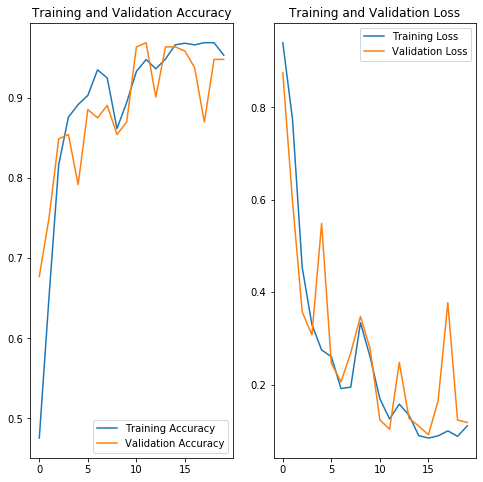

In [89]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

W0413 12:10:29.453593 26512 ag_logging.py:142] AutoGraph could not transform <function Model.make_predict_function.<locals>.predict_function at 0x0000020642C30158> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


first image to predict
actual label: Potato___Late_blight
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
predicted label: Potato___Late_blight


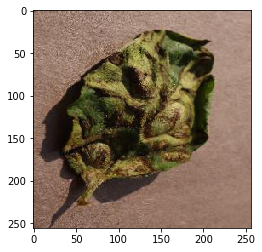

In [90]:
#Run prediction on sample image
import numpy as np


for images_batch, labels_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(labels_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [91]:
#Predict function

def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

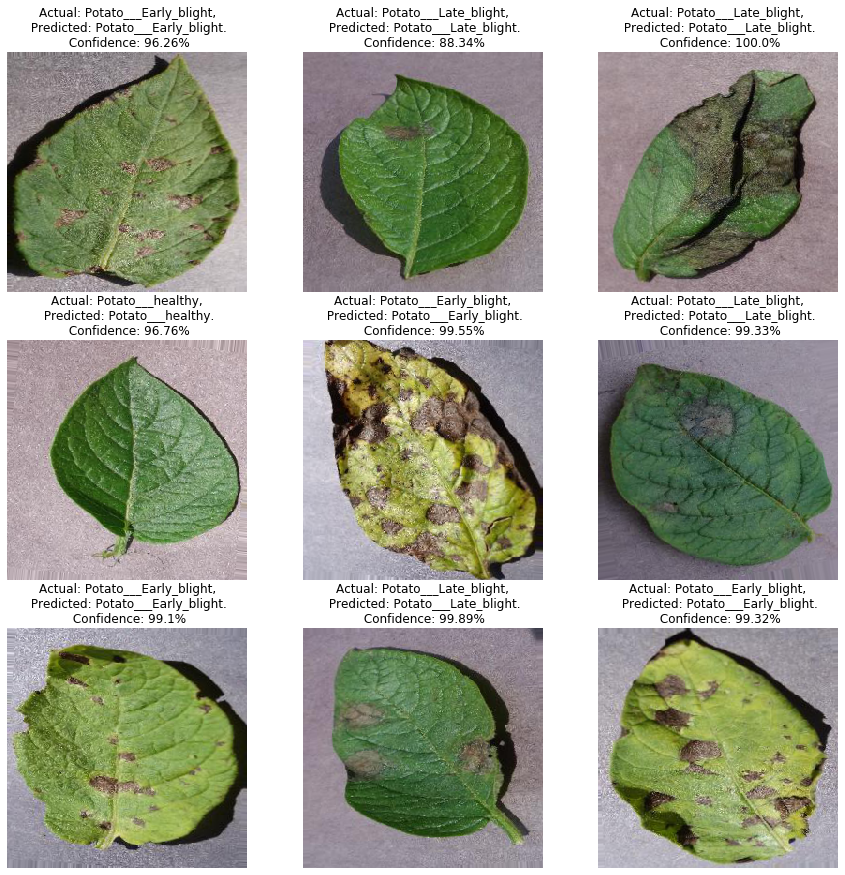

In [92]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [95]:
# Saving the Model
# Save model in h5 format so that there is just one file and we can upload that to GCP conveniently
model.save("../potato.h5")